<center><h1> Movie Genre Classification </center></h1>
<p> Name : Yugal D. Bhagat </br>
Batch : August 2024
</p>

In [1]:
#Importing necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, hamming_loss, classification_report

In [4]:
import gradio as gr 

In [7]:
#Loading dataset

In [9]:
train_df = pd.read_csv("C:/Users/YUG/Downloads/CODSOFT/TASK 1 - MOVIE GENRE CLASSIFICATION/Genre Classification Dataset/train_data.txt", sep=':::', names=["title", "genre", "description"], engine='python')

In [11]:
train = train_df

In [13]:
#basic info

In [15]:
train.head()

,title,genre,description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [17]:
train.describe() 

,title,genre,description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [19]:
train.isnull().sum()

title          0
genre          0
description    0
dtype: int64

In [21]:
# Genre information

In [23]:
print('No. of Unique-values-GENRE : ', train.genre.nunique())

No. of Unique-values-GENRE :  27


In [25]:
train_df.genre.value_counts()

genre
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   title        54214 non-null  object
 1   genre        54214 non-null  object
 2   description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


[Text(0.5, 1.0, 'Top 5 Genres')]

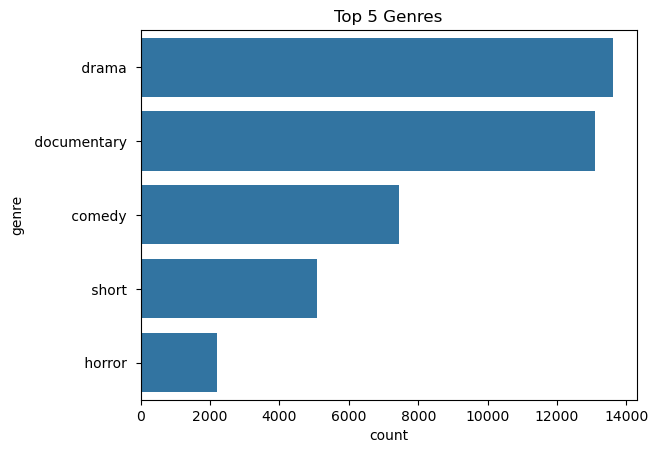

In [35]:
# Plot top 5 genres by count
genre = pd.DataFrame(train.genre.value_counts()).reset_index().head(5)
sns.barplot(x='count', y='genre', data=genre).set(title='Top 5 Genres')   

In [37]:
#preprocessing

In [39]:
train['genre'] = train['genre'].fillna('')  

In [41]:
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')

In [43]:
X = tfidf.fit_transform(train['description']).toarray()

In [44]:
print(X.shape)

(54214, 5000)


In [47]:
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(train['genre'])

In [49]:
#train test split

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Training

In [55]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

RandomForestClassifier()

In [59]:
#evaluation

In [61]:
y_pred = clf.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
loss = hamming_loss(y_test, y_pred)

In [63]:
print(f"Accuracy: {accuracy}")
print(f"Hamming Loss: {loss}")

Accuracy: 0.37369731624089275
Hamming Loss: 0.14836376771496204


In [64]:
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

              precision    recall  f1-score   support

                   1.00      1.00      1.00     10843
           -       0.88      0.03      0.06       456
           a       0.70      0.93      0.80      6793
           b       0.00      0.00      0.00        61
           c       0.73      0.58      0.65      4960
           d       0.70      0.97      0.81      7050
           e       0.74      0.60      0.66      5330
           f       1.00      0.01      0.02       367
           g       1.00      0.07      0.13       101
           h       0.77      0.07      0.13      2012
           i       0.82      0.02      0.04      1568
           k       1.00      0.02      0.05        81
           l       0.91      0.01      0.02       894
           m       0.74      0.98      0.84      7601
           n       0.77      0.55      0.64      3624
           o       0.75      0.76      0.75      6416
           p       0.60      0.02      0.04       154
           r       0.78    

C:\Users\YUG\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
def predict_genres(description):
    description = tfidf.transform([description]).toarray()
    prediction = clf.predict(description)
    return mlb.inverse_transform(prediction)

In [66]:
def gradio_predict(description):
    predicted_genres = predict_genres(description)
    return ', '.join(predicted_genres) if predicted_genres else "No genre predicted"

In [67]:
#Gradio UI

In [68]:
interface = gr.Interface(
    fn=gradio_predict,  
    inputs=gr.Textbox(lines=3, placeholder="movie plot summary ↓"),  
    outputs="text", 
    title="Movie Genre Classification",
    description="Enter the plot of a movie to predict its genres.",

)

In [69]:
interface.launch()

Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.
